Ce notebook vise à reproduire l'algorithme présenté dans "Communicability in complex networks" de Ernesto Estrada1 et Naomichi Hatano.

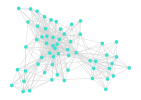

In [1]:
using LightGraphs, GraphPlot

g = SimpleGraph(loadgraph("../data/0001.lg")) # version non dirigée
x, y = spring_layout(g)
gplot(g, x, y)

In [2]:
Adj = adjacency_matrix(g)

59×59 SparseArrays.SparseMatrixCSC{Int64, Int64} with 814 stored entries:
⠮⠃⠯⠿⠹⢇⠿⡿⠀⣀⡼⠾⠯⠀⠃⠸⠬⢂⢀⡄⠁⠀⠎⠀⠀⠠⠍⠠⠺⡇
⣯⡇⡀⡨⣬⡒⢥⣹⠁⢘⢨⣬⡱⠀⡄⢘⢈⡄⠀⠀⢁⣠⢄⠀⠀⠀⢁⠀⣬⡅
⠷⢆⢢⠻⠪⠂⠝⠺⠀⣜⡸⠰⠾⠀⠀⠘⠜⢂⢀⡐⠒⠐⠔⠀⠁⠘⠀⠠⠰⡇
⣿⡧⣅⣳⣳⡁⣀⡸⡀⠠⢰⣐⣬⡄⠂⠰⠈⡠⠀⠀⢄⠒⠀⠀⠀⠀⢁⠈⢀⠇
⠀⢠⣁⢀⣀⢤⠀⡈⠀⡠⣌⠡⠙⠑⠀⢂⢋⢠⢢⠐⠀⠀⣀⠀⠀⠈⠈⠀⢀⠄
⣲⡏⡂⣶⢒⡊⢐⢲⠆⡙⣀⠘⢲⠀⡆⢰⠐⡌⠈⠁⠀⣀⠅⠀⠀⠀⠂⠀⣖⡃
⠋⠃⠑⠊⠚⠃⠂⠿⢗⠀⠘⠒⢪⡲⢲⡞⡖⠀⡇⢼⠒⠀⠐⡶⣶⠞⠒⡀⠐⠃
⣉⡀⣀⢉⣀⠀⢈⡀⠠⢀⢈⣉⣸⠶⡠⠊⢆⠁⠆⠰⠀⠈⠀⠖⠂⠂⠀⢆⣁⡀
⠢⢃⠂⠴⠲⢁⠂⡠⠋⣐⡐⠤⠘⠉⠌⠑⠀⠀⢁⡈⠀⠤⡀⠙⠀⠁⠀⠁⠄⡀
⠀⠴⠀⠀⢀⠰⠀⠀⢈⠒⠆⠀⣉⣍⢈⡁⡁⠰⡄⠉⠀⠀⠀⠈⡀⠁⠀⠠⠀⠆
⠁⠀⠁⣰⢘⠀⢠⠑⠀⠀⠀⢠⠘⠀⡀⠀⠀⡄⠀⠀⠀⡠⠘⠀⠀⠀⠀⠀⠘⠀
⠊⠁⠀⠑⠐⠁⠀⠀⠀⠘⠁⠁⢰⡤⢠⠄⣄⠈⡀⠀⠒⠀⠀⡠⢤⡄⠀⡄⠑⠁
⠀⡀⠀⠀⣁⠀⠀⠀⡀⠀⠀⠀⣸⠟⠨⠀⠄⠀⠄⠈⠀⠀⠀⠷⠀⠀⢀⠀⠀⠀
⠃⡁⠁⠐⠀⡀⡁⠐⠂⠀⠈⠀⠘⠠⠠⢄⠄⠀⠀⡀⠀⠀⠀⠤⠀⠐⠊⠀⠐⠁
⠾⠦⠆⠿⠴⠦⠤⠔⠀⠔⠼⠹⠴⠀⠁⠸⠀⠡⠠⠄⠒⠀⠕⠀⠀⠀⠔⠀⠠⠂

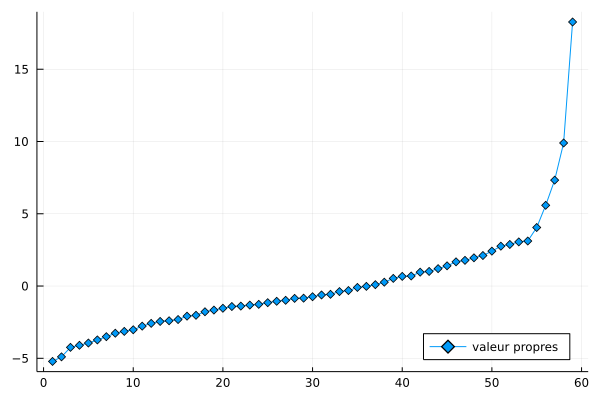

In [8]:
using LinearAlgebra, Plots

A = Matrix(Adj)
F = eigen(A)
V = F.vectors
D = F.values

plot(sort(D), marker=:d, label="valeur propres", legend=:bottomright)

In [12]:
(λ1,i1) = findmax(D) # dominant eigenvalue and its position
γ1 = V[:,i1] # dominant eigenvector
γ1_ = abs.(γ1) # normalized to positive

β = 1 # parameter
C1 = γ1_ * exp(β*λ1) * γ1_'; # matrix C1

In [24]:
G = exp(β*A); # communicability matrix

In [25]:
# remove intra- and inter-cluster communicabilities
ΔG = G - C1
ΔG = ΔG - diagm(diag(ΔG))
signΔG = map.(x->x>0, ΔG);

In [26]:
AC = signΔG - diagm(diag(signΔG)) # Adjacency matrix of the communicability graph

59×59 Matrix{Int64}:
 0  1  1  0  1  0  1  1  1  1  1  0  1  …  0  0  0  0  0  1  0  0  1  1  1  1
 1  0  1  1  1  0  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  1  1  1  1
 1  1  0  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  1  0  0  1  1  1  1
 0  1  1  0  1  1  0  1  0  0  1  1  0     0  0  0  0  0  0  0  0  1  0  1  1
 1  1  1  1  0  0  1  1  1  1  1  1  1     0  0  0  0  0  1  0  0  1  1  1  1
 0  0  1  1  0  0  0  0  0  0  1  1  1  …  1  1  1  1  1  1  1  1  1  0  0  1
 1  1  1  0  1  0  0  1  1  1  0  0  1     0  0  0  0  0  0  0  0  0  1  1  1
 1  1  1  1  1  0  1  0  1  1  0  1  1     0  0  0  0  0  0  0  0  1  1  1  1
 1  1  1  0  1  0  1  1  0  1  0  0  1     0  0  0  0  0  1  1  0  0  1  1  1
 1  1  1  0  1  0  1  1  1  0  0  0  1     0  0  0  0  0  0  0  0  0  1  1  1
 1  1  1  1  1  1  0  0  0  0  0  1  1  …  0  0  0  0  0  1  0  0  1  0  1  1
 0  1  1  1  1  1  0  1  0  0  1  0  0     0  0  0  0  0  0  0  0  1  0  1  1
 1  1  1  0  1  1  1  1  1  1  1  0  0     